In [ ]:
# Extract and plot data of Map section (Basic variables)
* This program is used to read the basic variable in Maps section of the OCDP data portal
* We just plot one map, user just need change the varName, MSA( Month, Season, Annual), RCP and Period
* To run this program, it is neccesary to install: 
   - pandas;
   - numpy;
   - matplotlib and 
   - geopandas
---
*Programmer: Dr. Ziwang Deng, LAMPS, Department of Mathematics & Statistics, York University*

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon
from geopandas import GeoSeries

In [7]:
# Variable names: mean temperature; maximum temperature, minimum temperature and precipiation
varNames = ['Tm','Tx','Tn','Pr']
# Month, season and annual averages
MonSeaAnn = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Spr','Sum','Aut','Win','Ann']
# column names for user to select for display maps
colNames =['id','Longitude','Latitude',
           'RCP85_P5_2050s','RCP85_P25_2050s','RCP85_P50_2050s','RCP85_P75_2050s','RCP85_P95_2050s',
           'RCP60_P5_2050s','RCP60_P25_2050s','RCP60_P50_2050s','RCP60_P75_2050s','RCP60_P95_2050s',
           'RCP45_P5_2050s','RCP45_P25_2050s','RCP45_P50_2050s','RCP45_P75_2050s','RCP45_P95_2050s',
           'RCP26_P5_2050s','RCP26_P25_2050s','RCP26_P50_2050s','RCP26_P75_2050s','RCP26_P95_2050s',
           'RCP85_P5_2080s','RCP85_P25_2080s','RCP85_P50_2080s','RCP85_P75_2080s','RCP85_P95_2080s',
           'RCP60_P5_2080s','RCP60_P25_2080s','RCP60_P50_2080s','RCP60_P75_2080s','RCP60_P95_2080s',
           'RCP45_P5_2080s','RCP45_P25_2080s','RCP45_P50_2080s','RCP45_P75_2080s','RCP45_P95_2080s',
           'RCP26_P5_2080s','RCP26_P25_2080s','RCP26_P50_2080s','RCP26_P75_2080s','RCP26_P95_2080s',
           'REF_1986_2005']

In [8]:
# what variable do you want to display or extract
varName='Tm'
MSA ='Ann'
RCP = 'RCP85' # RCP85 or RCP60 or RCP45 or RCP26 or REF
Percentile = '50' #5 or 25 or 50 or 75 or 95
Period = '2050s' #2050s or 2080s or 1986_2005

In [9]:
# read and map the variable
csvfileName = '../data/maps/basicVariables/' + \
    varName + '_8964Pts_RCPs_' + \
    MSA + '_8964Pts_RCPs_50s80s_Diffs_EC.csv'

colName = RCP + '_P' + Percentile + '_' + Period
if((RCP=='REF') or (Period =='1986_2005')):
    colName='REF_1986_2005'
data=pd.read_csv(csvfileName)
print(data.shape)
print(data.head(1))


(8964, 44)
   id  Longitude  Latitude  RCP85_P5_2050s  RCP85_P25_2050s  RCP85_P50_2050s  \
0   1      -89.0    56.875             1.3              2.6              3.7   

   RCP85_P75_2050s  RCP85_P95_2050s  RCP60_P5_2050s  RCP60_P25_2050s  ...  \
0              4.9              6.8             0.4              1.7  ...   

   RCP45_P25_2080s  RCP45_P50_2080s  RCP45_P75_2080s  RCP45_P95_2080s  \
0              2.8              3.7              4.9              6.9   

   RCP26_P5_2080s  RCP26_P25_2080s  RCP26_P50_2080s  RCP26_P75_2080s  \
0             0.1              1.2              2.1              3.1   

   RCP26_P95_2080s  REF_1986_2005  
0              4.9           -6.1  

[1 rows x 44 columns]


poly.head(1):
   id  Lon     Lat                                           geometry
0   1  -89  56.875  POLYGON ((-89.06249910184044 56.81250000000011...
polydata.head(1):
   id  Lon     Lat                                           geometry  \
0   1  -89  56.875  POLYGON ((-89.06249910184044 56.81250000000011...   

   Longitude  Latitude  RCP85_P5_2050s  RCP85_P25_2050s  RCP85_P50_2050s  \
0      -89.0    56.875             1.3              2.6              3.7   

   RCP85_P75_2050s  ...  RCP45_P25_2080s  RCP45_P50_2080s  RCP45_P75_2080s  \
0              4.9  ...              2.8              3.7              4.9   

   RCP45_P95_2080s  RCP26_P5_2080s  RCP26_P25_2080s  RCP26_P50_2080s  \
0              6.9             0.1              1.2              2.1   

   RCP26_P75_2080s  RCP26_P95_2080s  REF_1986_2005  
0              3.1              4.9           -6.1  

[1 rows x 47 columns]


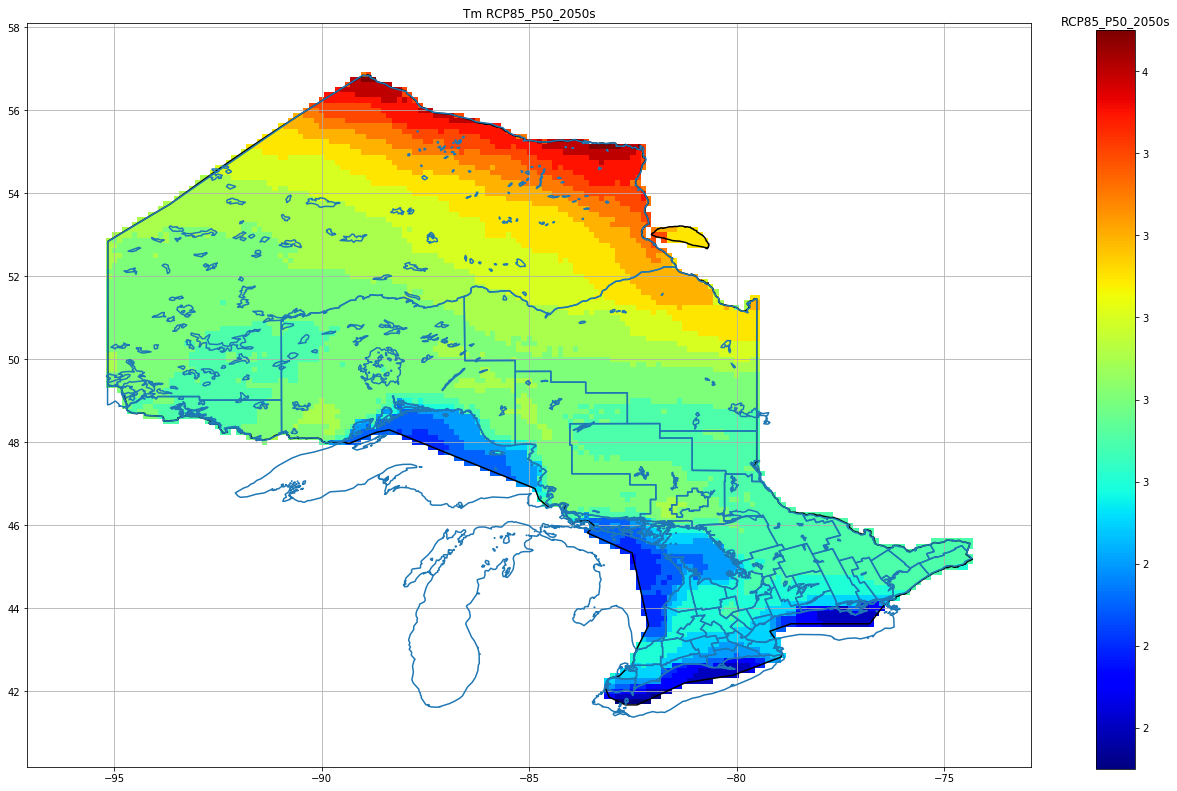

In [10]:
# read geojson files
lakefile='../shapefiles/Lake_Arc_simplify.geojson'
Municipal = '../shapefiles/Municipal_Arc_simplify.geojson'
Ontario = '../shapefiles/Ontario_arc.geojson'
OnPolygon = '../shapefiles/polygon9864.geojson'

# plot the background
p1=Polygon([(-96,41),(-74,41),(-74,57.3),(-96,57.3)])
g = GeoSeries(p1)
base=g.plot(color='white', edgecolor='white', figsize=(18,27))

# plot Ontario boundary
ont=gpd.read_file(Ontario)
ont.plot(ax=base, color='black', edgecolor='black')

# plot the lakes within Ontario
lake=gpd.read_file(lakefile)
lake.plot(ax=base)

# plot municipals
muni=gpd.read_file(Municipal)
muni.plot(ax=base)

# merge grid polygon and the data for plotting spatial variation map
cmp='jet'
poly=gpd.read_file(OnPolygon)
print('poly.head(1):')
print(poly.head(1))

polydata=poly.merge(data, on='id')
print('polydata.head(1):')
print(polydata.head(1))
ax = polydata.plot(ax=base, column=colName, colormap=cmp,vmin=min(polydata[colName]),vmax=max(polydata[colName]))

# setting legend
# thanks to: https://stackoverflow.com/questions/54236083/geopandas-reduce-legend-size-and-remove-white-space-below-map
ax.set_title(varName + ' ' + colName)
ax.grid() 
fig = ax.get_figure()
# here, need trial-and-error to get [l,b,w,h] right
# l:left, b:bottom, w:width, h:height; in normalized unit (0-1)

cbax = fig.add_axes([0.95, 0.31, 0.03, 0.38])   
cbax.set_title(colName)

sm = plt.cm.ScalarMappable(cmap=cmp,norm=plt.Normalize(vmin=min(polydata[colName]), vmax=max(polydata[colName])))
sm._A = []
fig.colorbar(sm, cax=cbax, format="%d")
plt.show()